In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Lasso, SGDRegressor, Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
path = ""
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
            path = os.path.join(dirname, filename)

In [3]:
data = pd.read_csv(path)
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
lb = LabelEncoder()

data['Car_Name'] = lb.fit_transform(data['Car_Name'])
car_name_labels = lb.classes_

data['Fuel_Type'] = lb.fit_transform(data['Fuel_Type'])
fuel_type_labels = lb.classes_

data['Seller_Type'] = lb.fit_transform(data['Seller_Type'])
seller_type_labels = lb.classes_

data['Transmission'] = lb.fit_transform(data['Transmission'])
transmission_labels = lb.classes_

print("car_name_labels =", car_name_labels)
print("fuel_type_labels =", fuel_type_labels)
print("seller_type_labels =", seller_type_labels)
print("transmission_labels =", transmission_labels)

car_name_labels = ['800' 'Activa 3g' 'Activa 4g' 'Bajaj  ct 100' 'Bajaj Avenger 150'
 'Bajaj Avenger 150 street' 'Bajaj Avenger 220' 'Bajaj Avenger 220 dtsi'
 'Bajaj Avenger Street 220' 'Bajaj Discover 100' 'Bajaj Discover 125'
 'Bajaj Dominar 400' 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 135 LS'
 'Bajaj Pulsar 150' 'Bajaj Pulsar 220 F' 'Bajaj Pulsar NS 200'
 'Bajaj Pulsar RS200' 'Hero  CBZ Xtreme' 'Hero  Ignitor Disc'
 'Hero Extreme' 'Hero Glamour' 'Hero Honda CBZ extreme'
 'Hero Honda Passion Pro' 'Hero Hunk' 'Hero Passion Pro'
 'Hero Passion X pro' 'Hero Splender Plus' 'Hero Splender iSmart'
 'Hero Super Splendor' 'Honda Activa 125' 'Honda Activa 4G'
 'Honda CB Hornet 160R' 'Honda CB Shine' 'Honda CB Trigger'
 'Honda CB Unicorn' 'Honda CB twister' 'Honda CBR 150' 'Honda Dream Yuga '
 'Honda Karizma' 'Hyosung GT250R' 'KTM 390 Duke ' 'KTM RC200' 'KTM RC390'
 'Mahindra Mojo XT300' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 350' 'Royal Enfield Classic 500'
 'Royal Enfield Thunder 35

In [5]:
std = StandardScaler()
newData = pd.DataFrame(std.fit_transform(data))

newData[8] = lb.fit_transform(newData[8])
print(lb.classes_)

[-0.17450057  3.86585888 11.94657778]


In [6]:
newData.head()

,0,1,2,3,4,5,6,7,8
0,1.074323,0.128897,-0.258416,-0.236215,-0.256224,0.500183,-0.737285,0.39148,0
1,1.191828,-0.217514,0.017481,0.221505,0.155911,-1.852241,-0.737285,0.39148,0
2,0.212627,1.168129,0.510154,0.257427,-0.773969,0.500183,-0.737285,0.39148,0
3,1.309332,-0.910335,-0.356950,-0.403079,-0.817758,0.500183,-0.737285,0.39148,0
4,1.152659,0.128897,-0.012079,-0.087890,0.141743,-1.852241,-0.737285,0.39148,0


In [7]:
newData.describe()

,0,1,2,3,4,5,6,7,8
count,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,301.000000
mean,8.262125e-17,-2.929218e-14,-7.081821e-17,-7.081821e-17,5.016290e-17,1.062273e-16,1.180304e-16,-5.311366e-17,0.039867
std,1.001665e+00,1.001665e+00,1.001665e+00,1.001665e+00,1.001665e+00,1.001665e+00,1.001665e+00,1.001665e+00,0.212302
min,-2.450800e+00,-3.681621e+00,-8.988906e-01,-8.468932e-01,-9.388230e-01,-4.204665e+00,-7.372854e-01,-2.554408e+00,0.000000
25%,-6.099024e-01,-5.639244e-01,-7.412353e-01,-7.449203e-01,-5.653257e-01,5.001832e-01,-7.372854e-01,3.914801e-01,0.000000
50%,2.517945e-01,1.288970e-01,-2.091486e-01,-1.423532e-01,-1.274323e-01,5.001832e-01,-7.372854e-01,3.914801e-01,0.000000
75%,7.609791e-01,8.217184e-01,2.638173e-01,2.632208e-01,3.044594e-01,5.001832e-01,1.356327e+00,3.914801e-01,0.000000
max,1.348500e+00,1.514540e+00,5.978822e+00,9.846355e+00,1.192752e+01,5.001832e-01,1.356327e+00,3.914801e-01,2.000000


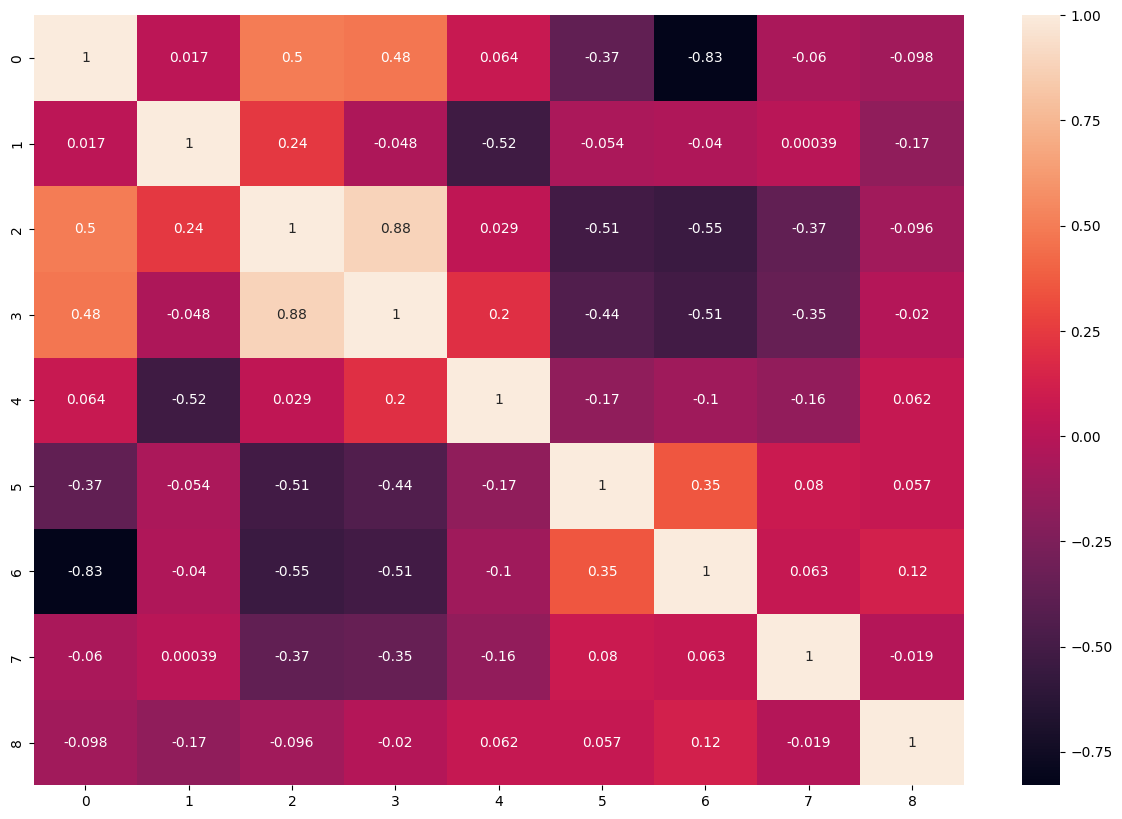

In [8]:
plt.figure(figsize = (15,10))
sns.heatmap(newData.corr(), annot = True)
plt.show()